In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

%matplotlib inline

In [71]:
prediction_column = 'sale_price'
input_columns = ['centris_no', 'municipal_value', 'year_constructed', 'bedrooms',
           'bathrooms', 'square_feet', 'neighborhood']

all_columns = input_columns.copy()
all_columns.append(prediction_column)

plateau = 'plateau'

In [72]:
listings_df = pd.read_csv('./data/listings.csv', usecols=all_columns)
listings_df.head()

,centris_no,sale_price,municipal_value,year_constructed,bedrooms,bathrooms,square_feet,neighborhood
0,23944583,698000,554700,2001,3,2,1102,plateau
1,24217373,519000,349500,1970,3,2,1117,plateau
2,22474730,600000,398600,1900,3,2,1114,plateau
3,18082666,645000,470000,2018,2,2,746,plateau
4,19968722,794650,730000,2019,3,2,1697,plateau


In [73]:
sales_df = pd.read_csv('./data/sales.csv', usecols=all_columns)
sales_df.head()

,centris_no,sale_price,municipal_value,year_constructed,bedrooms,bathrooms,square_feet,neighborhood
0,25653682,408000,285600,2000,3,1,1002,plateau
1,13654462,445000,312100,1995,3,2,1032,villeray
2,19148165,451000,350000,1999,2,2,1087,plateau
3,22688488,491194,281000,1991,2,1,1146,plateau
4,14211513,550000,575400,1997,4,2,2000,rosemont


In [74]:
combined_df = listings_df.copy().append(sales_df)
combined_df.head()

,centris_no,sale_price,municipal_value,year_constructed,bedrooms,bathrooms,square_feet,neighborhood
0,23944583,698000,554700,2001,3,2,1102,plateau
1,24217373,519000,349500,1970,3,2,1117,plateau
2,22474730,600000,398600,1900,3,2,1114,plateau
3,18082666,645000,470000,2018,2,2,746,plateau
4,19968722,794650,730000,2019,3,2,1697,plateau


In [75]:
current_listings = listings_df[(listings_df.bedrooms == 2) & (listings_df.bathrooms == 2)]
current_listings

,centris_no,sale_price,municipal_value,year_constructed,bedrooms,bathrooms,square_feet,neighborhood
3,18082666,645000,470000,2018,2,2,746,plateau
6,18027048,895000,636300,1975,2,2,1800,plateau
9,27739102,949000,813600,1910,2,2,1512,plateau
10,17223418,1095000,820400,2012,2,2,1823,plateau
17,11000889,797000,522350,1900,2,2,1235,plateau
18,24166084,879900,771000,1900,2,2,1513,plateau
19,16821505,889000,659300,1889,2,2,1484,plateau
20,17540576,899000,785200,1915,2,2,1689,plateau


In [76]:
current_listings.sale_price.median()

892000.0

In [149]:
print(f"Total listings: {len(combined_df)}")
combined_df[combined_df.municipal_value > combined_df.sale_price]

Total listings: 34


,centris_no,sale_price,municipal_value,year_constructed,bedrooms,bathrooms,square_feet,neighborhood
4,14211513,550000,575400,1997,4,2,2000,rosemont


In [157]:
# Build training set
# training_data = listings_df.copy()
training_data = combined_df.copy()[combined_df.neighborhood == plateau]

X = training_data[input_columns]
del X['centris_no']
del X['neighborhood']
del X['year_constructed']

y = training_data[prediction_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [158]:
# Train model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [159]:
# Make predictions using testing set
y_pred = regr.predict(X_test)

In [160]:
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [7.43439759e-01 4.10073848e+03 5.58554016e+04 1.90483010e+02]
Mean squared error: 13876058083.75
Coefficient of determination: 0.87


In [161]:
our_house = pd.DataFrame({
    'municipal_value': [635100],
    'bedrooms': [2],
    'bathrooms': [2],
    'square_feet': [1108],
})
our_house.head()

,municipal_value,bedrooms,bathrooms,square_feet
0,635100,2,2,1108


In [162]:
predicted_listing_price = regr.predict(our_house)
print(predicted_listing_price)

[754905.70513529]


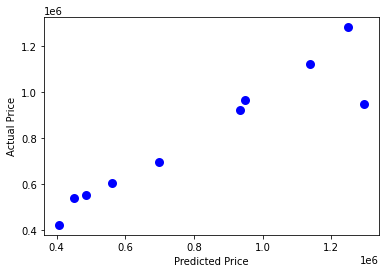

In [165]:
# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
plt.scatter(y_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')

plt.show()